In [18]:
import numpy as np
import matplotlib.pyplot as plt
import jupyter as j
import importlib
    
def compare(*args, **kwargs):
    importlib.reload(j)
    j.compare(*args, **kwargs)

custom jupyter @DanielRobinson


In [19]:
files = []
files.append(['release/release1/*','release/release16/*','release/release64/*','release/release128/*','release/release256/*','release/release512/*', 'release/release0/*'])
files.append(['echo/deregister/*', 'echo/e/*', 'echo/echo/*', 'echo/register/*'])
files.append(['cops/delay/*', 'cops/deregister/*', 'cops/release/*', 'cops/tensec/*'])
files.append(['drx/cap/*'])
files.append(['ptau/capture/*'])
files = sum(files, [])
print(files)

['release/release1/*', 'release/release16/*', 'release/release64/*', 'release/release128/*', 'release/release256/*', 'release/release512/*', 'release/release0/*', 'echo/deregister/*', 'echo/e/*', 'echo/echo/*', 'echo/register/*', 'cops/delay/*', 'cops/deregister/*', 'cops/release/*', 'cops/tensec/*', 'drx/cap/*', 'ptau/capture/*']


custom jupyter @DanielRobinson


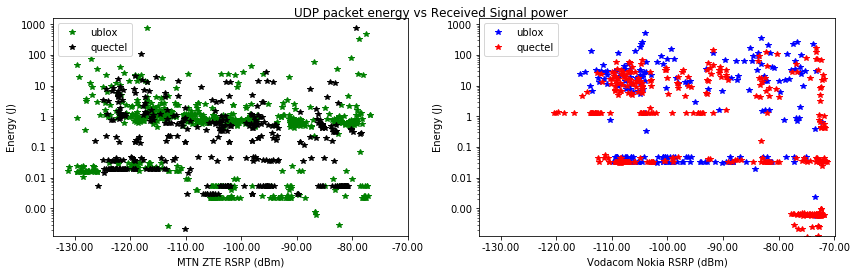

In [56]:
def thresh(a, key, split):
    a = np.array(a[key])
    r = a == a
    lim = [None, None]
    if key == 'Signal power':
        r *= a > -1450
    return r, lim
compare(files, thresh, 'UDP packet energy vs Received Signal power', 'Energy (J)', 'RSRP (dBm)', 'energy', 'Signal power', 1000, 10, split=1, log=True)

custom jupyter @DanielRobinson
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   1.   2.   5.   9.
  16.  31.  59. 112. 212. 402. 761.]
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   1.   2.   4.   7.
  13.  24.  43.  80. 149. 276. 510.]


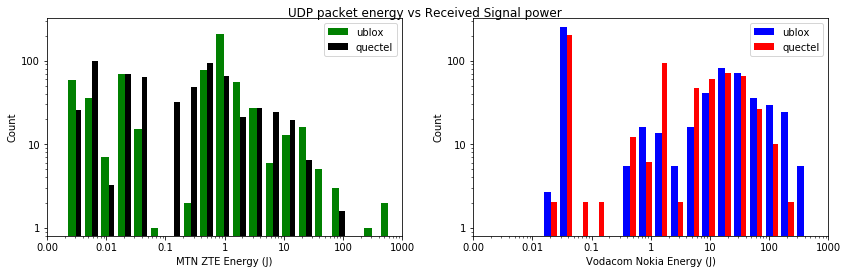

In [57]:
def thresh(a, key, split):
    a = np.array(a[key])
    r = a == a
    lim = [None, None]
    if key == 'energy':
        r *= a > 0
        limits = [1000000, 30000, 1]
        r, lim = j.splitter(r, a, limits, split, True)
#         print(lim)
    if key == 'Signal power':
        r *= a > -1450
    return r, lim
compare(files, thresh, 'UDP packet energy vs Received Signal power', 'Count', 'Energy (J)', 'energy', 'Signal power', 1000, 10, split=1, hist=True, log=True)

[3 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1] [  1.  11.  21.  31.  41.  51.  61.  71.  81.  91. 100. 110. 120. 130.
 140. 150. 160. 170. 180. 190. 200.]
bins:  [   1   10  100 1000]


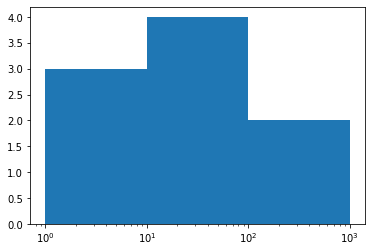

In [44]:
import matplotlib.pyplot as plt
import numpy as np

data = [1.2, 14, 150, 21, 35, 66, 200, 2, 1]
bins = 10**(np.arange(0,4))
h, b = np.histogram(data, bins=20)
print(h, b)
print ("bins: ", bins)
plt.xscale('log')
plt.hist(data,bins=bins) 

plt.show()

In [4]:
1

1

[[2, 1, 76, 140, 286, 267, 60, 271, 5, 13, 9, 76, 77, 6, 2, 27, 22, 1, 12, 7, 19, 81, 11, 173, 13, 7, 16, 19, 23, 197, 167, 1], [2, 1, 76, 140, 286, 267, 60, 271, 5, 13, 9, 76, 77, 6, 2, 27, 22, 1, 12, 7, 19, 81, 11, 173, 13, 7, 16, 19, 23, 197, 167, 1]]
(2, 32)
[  1.     36.625  72.25  107.875 143.5   179.125 214.75  250.375 286.   ]
[  1.           2.02789635   4.11236362   8.33944718  16.91153453
  34.29483918  69.5463793  141.03284894 286.        ]


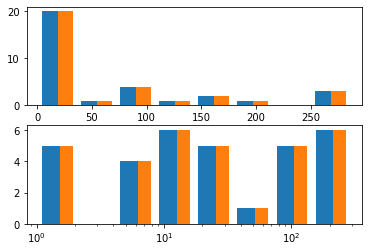

In [16]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = [2, 1, 76, 140, 286, 267, 60, 271, 5, 13, 9, 76, 77, 6, 2, 27, 22, 1, 12, 7, 19, 81, 11, 173, 13, 7, 16, 19, 23, 197, 167, 1]
x = [x, x]
print(x)
print(np.array(x).shape)
# x = np.array(x)

# histogram on linear scale
plt.subplot(211)
hist, bins, _ = plt.hist(x, bins=8)
print(bins)

# histogram on log scale. 
# Use non-equal bin sizes, such that they look equal on log scale.
logbins = np.logspace(np.log10(bins[0]), np.log10(bins[-1]), len(bins))

print(logbins)
plt.subplot(212)
plt.hist(x, bins=logbins)
plt.xscale('log')
plt.show()

custom jupyter @DanielRobinson


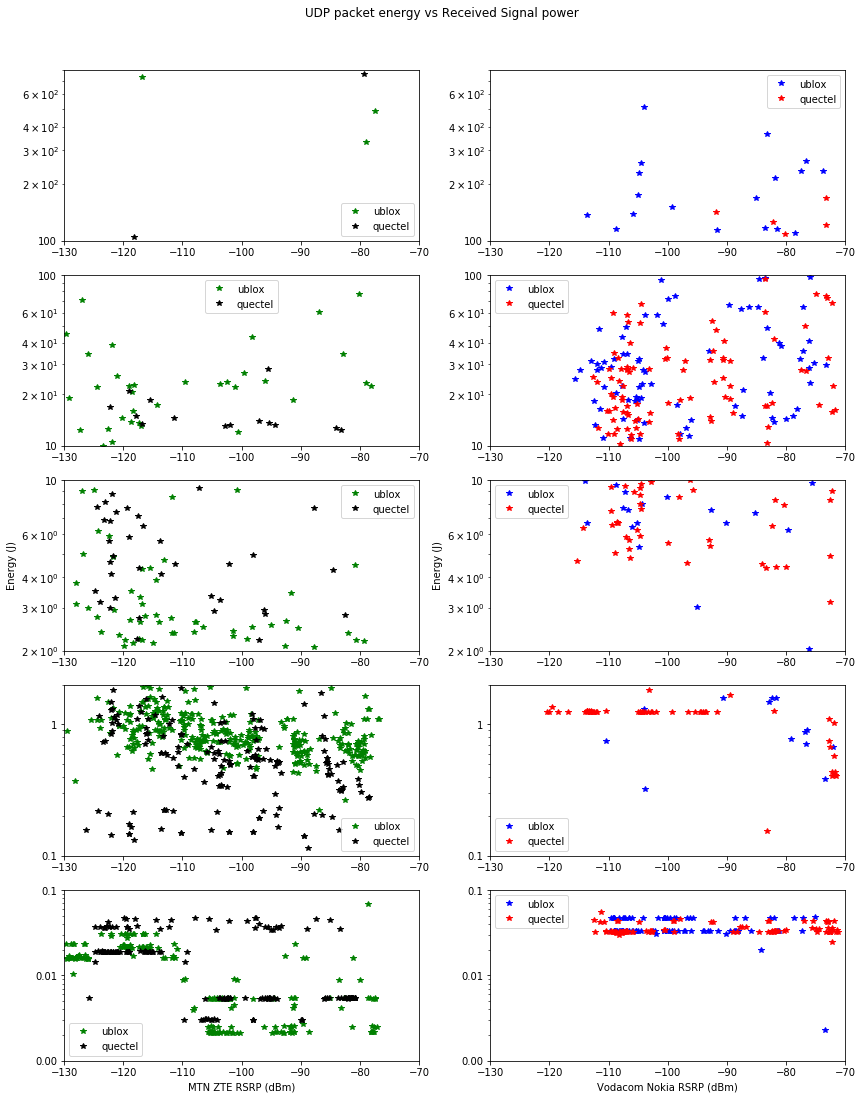

In [20]:
def thresh(a, key, split):
    a = np.array(a[key])
    r = a == a
    lim = [None, None]
    tsplit, slen = split
    if key == 'energy':
        r *= a > 0
        limits = [800000, 100000, 10000, 2000, 100, 1]
        r, lim = j.splitter(r, a, limits, split, True)
#         lim = [limits[tsplit+1], limits[tsplit]]
#         r *= a < limits[tsplit]
#         r *= a >= limits[tsplit+1]
    elif key == 'Signal power':
        r *= a > -1450
        lim = [-1300, -700]
    return r, lim
compare(files, thresh, 'UDP packet energy vs Received Signal power', 'Energy (J)', 'RSRP (dBm)', 'energy', 'Signal power', 1000, 10, split=5)

custom jupyter @DanielRobinson
[100. 135. 170. 205. 240. 275. 310. 345. 380. 415. 450. 485. 520. 555.
 590. 625. 660. 695. 730. 765. 800.]
[100. 135. 170. 205. 240. 275. 310. 345. 380. 415. 450. 485. 520. 555.
 590. 625. 660. 695. 730. 765. 800.]
[ 10.  14.  19.  24.  28.  32.  37.  42.  46.  50.  55.  60.  64.  68.
  73.  78.  82.  86.  91.  96. 100.]
[ 10.  14.  19.  24.  28.  32.  37.  42.  46.  50.  55.  60.  64.  68.
  73.  78.  82.  86.  91.  96. 100.]
[ 2.  2.  3.  3.  4.  4.  4.  5.  5.  6.  6.  6.  7.  7.  8.  8.  8.  9.
  9. 10. 10.]
[ 2.  2.  3.  3.  4.  4.  4.  5.  5.  6.  6.  6.  7.  7.  8.  8.  8.  9.
  9. 10. 10.]
[0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2.]
[0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


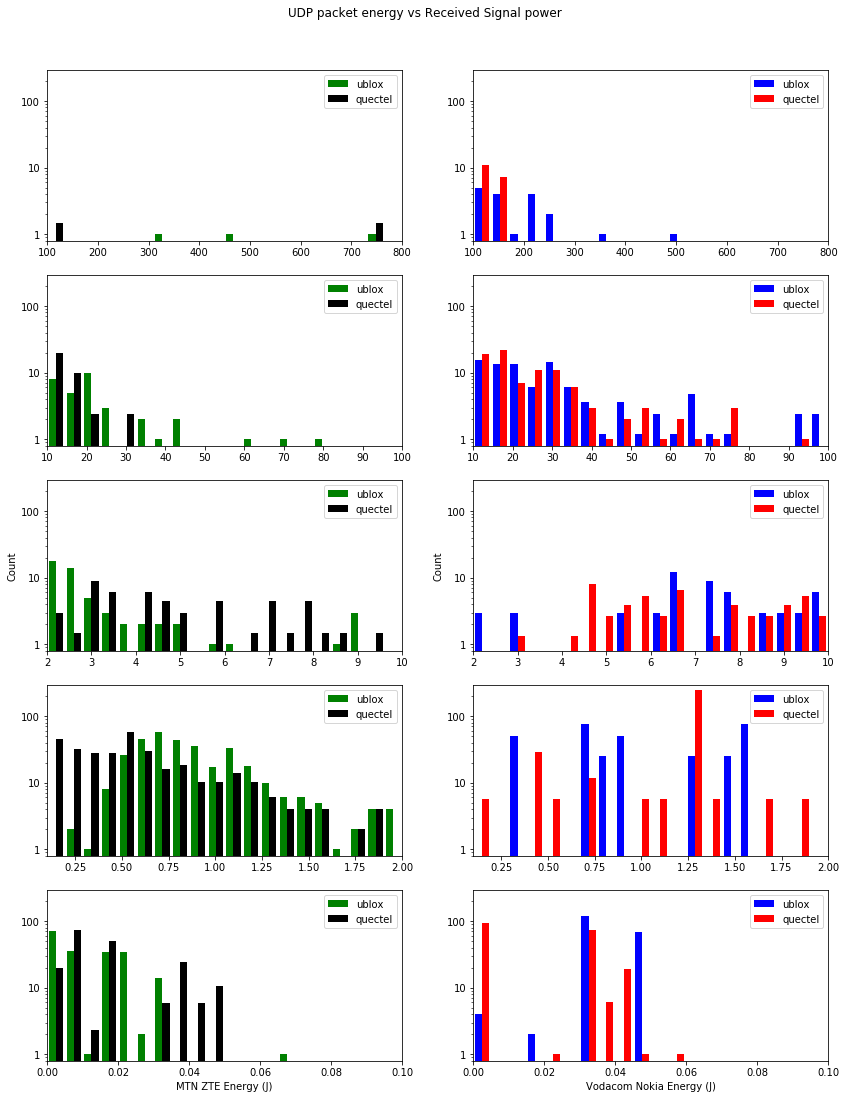

In [11]:
compare(files, thresh, 'UDP packet energy vs Received Signal power', 'Count', 'Energy (J)', 'energy', 'Signal power', 1000, 10, ['ublox', 'quectel'], ['zte', 'nokia'], 5, True, 20, True)

custom jupyter @DanielRobinson
100.0 800.0 0.0 2.1
10.0 100.0 0.0 40.95
2.0 10.0 0.0 7.35
0.1 2.0 0.0 44.1
0.0 0.1 0.0 99.75


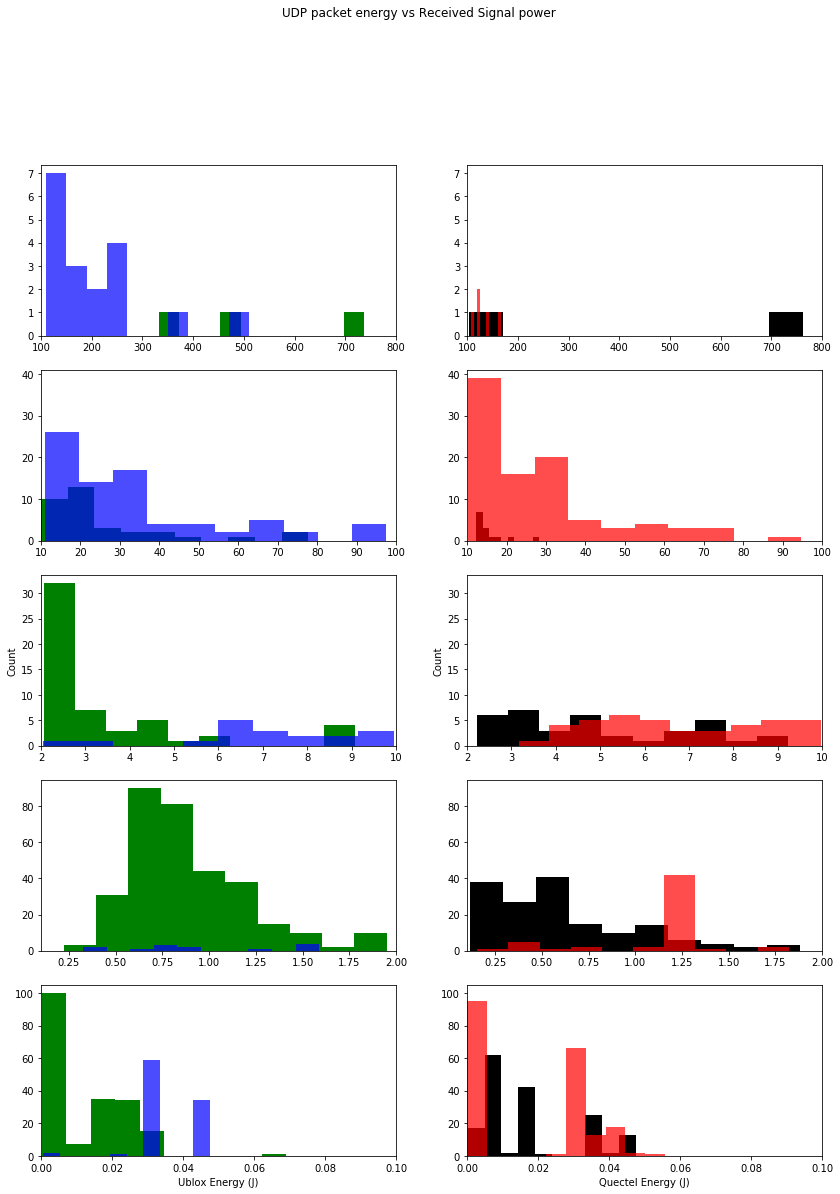

In [167]:
compare(files, thresh, 'UDP packet energy vs Received Signal power', 'Count', 'Energy (J)', 'energy', 'Signal power', 1000, 10, ['zte', 'nokia'], ['ublox', 'quectel'], 5, True)